In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("non-clean-usage.csv")

In [86]:
neg_cons = pd.read_csv ('negative_conses.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       79848 non-null  int64  
 1   Subscription Code                79848 non-null  object 
 2   Flow Rate (l/s)                  33377 non-null  float64
 3   Number of Negative Flows         79848 non-null  int64  
 4   Percentage of Negative Flows     79848 non-null  float64
 5   Operating Hours (h)              41304 non-null  float64
 6   Consumption (m³)                 47081 non-null  float64
 7   Number of Available Data Points  79848 non-null  int64  
 8   تعداد مورد انتظار                79848 non-null  int64  
 9   درصد اطلاعات موجود               79848 non-null  float64
 10  month                            79848 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 6.7+ MB


In [4]:
79848 / 36

2218.0

In [79]:
# df.drop(columns=["Unnamed: 0"],inplace=True)

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
try:
    import missingno as msno
except ImportError:
    msno = None

class DataCleaner:
    """
    A powerful data cleaning module to detect missing values, outliers, and anomalies in a DataFrame.
    """
    def __init__(self, df):
        self.df = df.copy()

    def report_missing(self):
        missing_count = self.df.isnull().sum()
        missing_percent = 100 * missing_count / len(self.df)
        missing_df = pd.DataFrame({
            'missing_count': missing_count,
            'missing_percent': missing_percent
        })
        print("=== Missing Data Report ===")
        display(missing_df)

    def visualize_missing(self):
        print("=== Visualizing Missing Data ===")
        plt.figure(figsize=(12,6))
        sns.heatmap(self.df.isnull(), cbar=False, cmap='viridis')
        plt.title('Missing Data Heatmap')
        plt.show()
        if msno:
            msno.matrix(self.df, figsize=(12,4), sparkline=True)
            plt.show()

    def report_outliers(self, numeric_cols=None, method='iqr', z_thresh=3.0):
        if numeric_cols is None:
            numeric_cols = self.df.select_dtypes(include=[np.number]).columns.tolist()

        outlier_summary = []
        for col in numeric_cols:
            series = self.df[col].dropna().astype(float)
            if series.empty:
                continue
            if method == 'zscore':
                mean, std = series.mean(), series.std()
                z_scores = np.abs((series - mean) / std)
                num_outliers = (z_scores > z_thresh).sum()
            else:  # IQR method
                q1, q3 = series.quantile([0.25, 0.75])
                iqr = q3 - q1
                lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
                num_outliers = ((series < lower) | (series > upper)).sum()
            outlier_summary.append({
                'column': col,
                'outliers': num_outliers,
                'total_values': len(series)
            })

        outlier_df = pd.DataFrame(outlier_summary)
        print("=== Outliers Report ===")
        display(outlier_df)

    def report_anomalies(self, numeric_cols=None):
        print("=== Anomaly Detection ===")
        self.report_missing()
        self.report_outliers(numeric_cols=numeric_cols)

    def impute_missing(self, strategy='median'):
        df = self.df.copy()
        for col in df.columns:
            if df[col].isnull().any():
                if strategy == 'mean':
                    fill_val = df[col].mean()
                elif strategy == 'mode':
                    fill_val = df[col].mode().iloc[0]
                else:
                    fill_val = df[col].median()
                df[col].fillna(fill_val, inplace=True)
        return df

    def cap_outliers(self, numeric_cols=None):
        df = self.df.copy()
        if numeric_cols is None:
            numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
        for col in numeric_cols:
            series = df[col]
            q1, q3 = series.quantile([0.25, 0.75])
            iqr = q3 - q1
            lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            df[col] = series.clip(lower, upper)
        return df

    def clean(self,
              impute_strategy='median',
              outlier_method='iqr',
              z_thresh=3.0,
              numeric_cols=None):
        """
        Perform full cleaning:
        1. Report anomalies (missing + outliers)
        2. Visualize missing data
        3. Impute missing values
        4. Cap outliers
        Returns a cleaned DataFrame.
        """
        # Step 1: Reports
        self.report_anomalies(numeric_cols=numeric_cols)
        self.visualize_missing()

        # Step 2: Imputation
        df_clean = self.impute_missing(strategy=impute_strategy)

        # Step 3: Outlier capping
        cleaner = DataCleaner(df_clean)
        if outlier_method in ['zscore', 'iqr']:
            cleaner.df = df_clean
            df_clean = cleaner.cap_outliers(numeric_cols=numeric_cols)

        print("=== Data cleaning complete ===")
        return df_clean

# Example usage:
# cleaner = DataCleaner(df)
# df_clean = cleaner.clean(impute_strategy='median', outlier_method='iqr')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Subscription Code                79848 non-null  object 
 1   Flow Rate (l/s)                  33377 non-null  float64
 2   Number of Negative Flows         79848 non-null  int64  
 3   Percentage of Negative Flows     79848 non-null  float64
 4   Operating Hours (h)              41304 non-null  float64
 5   Consumption (m³)                 47081 non-null  float64
 6   Number of Available Data Points  79848 non-null  int64  
 7   تعداد مورد انتظار                79848 non-null  int64  
 8   درصد اطلاعات موجود               79848 non-null  float64
 9   month                            79848 non-null  object 
dtypes: float64(5), int64(3), object(2)
memory usage: 6.1+ MB


In [8]:
def convert_to_object(df, cols):
    """
    Convert specified columns in the DataFrame to object dtype.
    Parameters:
        df (pd.DataFrame): The DataFrame to modify.
        cols (list of str): List of column names to convert.
    Returns:
        pd.DataFrame: The DataFrame with specified columns as object dtype.
    """
    for col in cols:
        if col in df.columns:
            df[col] = df[col].astype(object)
        else:
            print(f"Warning: Column '{col}' not found in DataFrame.")
    return df


In [9]:
cleaner = DataCleaner(df)

=== Visualizing Missing Data ===


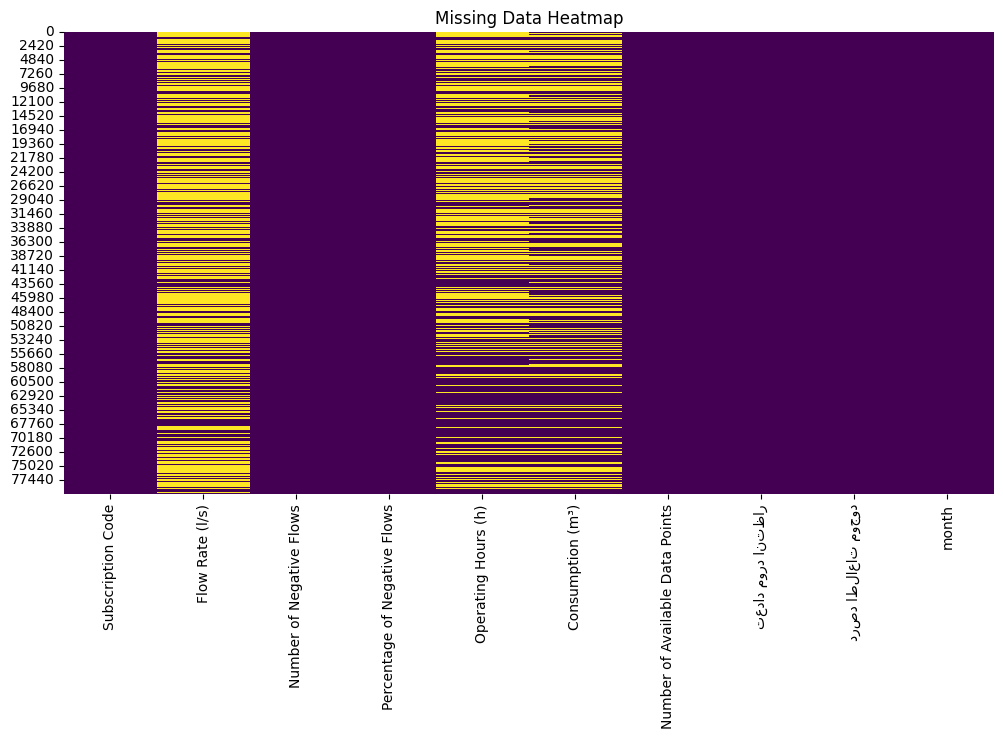

In [10]:
cleaner.visualize_missing()

In [11]:
info = pd.read_csv("data/1401_claean_info.csv")

In [12]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         2218 non-null   int64  
 1   Subscription Code                  2218 non-null   object 
 2   License Type                       1567 non-null   object 
 3   County                             2218 non-null   object 
 4   Meter Serial                       2218 non-null   float64
 5   Meter Size                         2218 non-null   float64
 6   Installation Date                  2218 non-null   object 
 7   Last Connection Time               2112 non-null   object 
 8   Consumption in Period (m³)         1319 non-null   float64
 9   Operating Hours in Period (h)      1200 non-null   float64
 10  Average Flow Rate in Period (l/s)  1181 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 190.7+ 

In [13]:
cleaner.report_missing()

=== Missing Data Report ===


,missing_count,missing_percent
Subscription Code,0,0.000000
Flow Rate (l/s),46471,58.199329
Number of Negative Flows,0,0.000000
Percentage of Negative Flows,0,0.000000
Operating Hours (h),38544,48.271716
Consumption (m³),32767,41.036720
Number of Available Data Points,0,0.000000
تعداد مورد انتظار,0,0.000000
درصد اطلاعات موجود,0,0.000000
month,0,0.000000


In [14]:
info_copy = info.copy()
info_copy['Installation_Year'] = info['Installation Date'].str.split('/').str[0]
info_copy['Installation_Month'] = info['Installation Date'].str.split('/').str[0] + "/" + info['Installation Date'].str.split('/').str[1]

In [15]:
info_copy

,Unnamed: 0,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s),Installation_Year,Installation_Month
0,1,520009,صنعتی,مشهد,9.098011e+11,50.0,1402/11/15,1404/01/28 - 03:07:28,NaN,NaN,NaN,1402,1402/11
1,2,200654,کشاورزی,قوچان,9.098010e+11,80.0,1400/02/12,1404/01/28 - 02:08:15,23879.930,343575.4,1.15,1400,1400/02
2,3,622162,کشاورزی,تربت حیدریه,9.098011e+11,50.0,1403/02/27,1403/09/08 - 03:10:09,NaN,NaN,NaN,1403,1403/02
3,4,515618,کشاورزی,مشهد,9.098010e+11,125.0,1400/02/30,1404/01/28 - 02:10:25,103922.600,475073.2,6.91,1400,1400/02
4,5,529232,کشاورزی,مشهد,9.098010e+11,125.0,1401/06/23,1404/01/28 - 02:11:21,84159.690,68022.1,6.00,1401,1401/06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2214,925247,کشاورزی,باخرز,9.098010e+11,50.0,1400/03/24,1404/01/28 - 02:10:01,5685.400,56574.8,3.30,1400,1400/03
2214,2215,518473,کشاورزی,مشهد,9.098010e+11,100.0,1399/06/03,1404/01/28 - 03:01:20,250173.700,909533.1,12.28,1399,1399/06
2215,2216,201250,NaN,قوچان,9.098010e+11,50.0,1399/07/07,1404/01/28 - 02:10:42,8595.251,3673.9,2.66,1399,1399/07
2216,2217,925005,کشاورزی,باخرز,9.098010e+11,100.0,1400/03/03,1403/07/29 - 02:04:50,338274.800,437856.7,30.17,1400,1400/03


=== Visualizing Missing Data ===


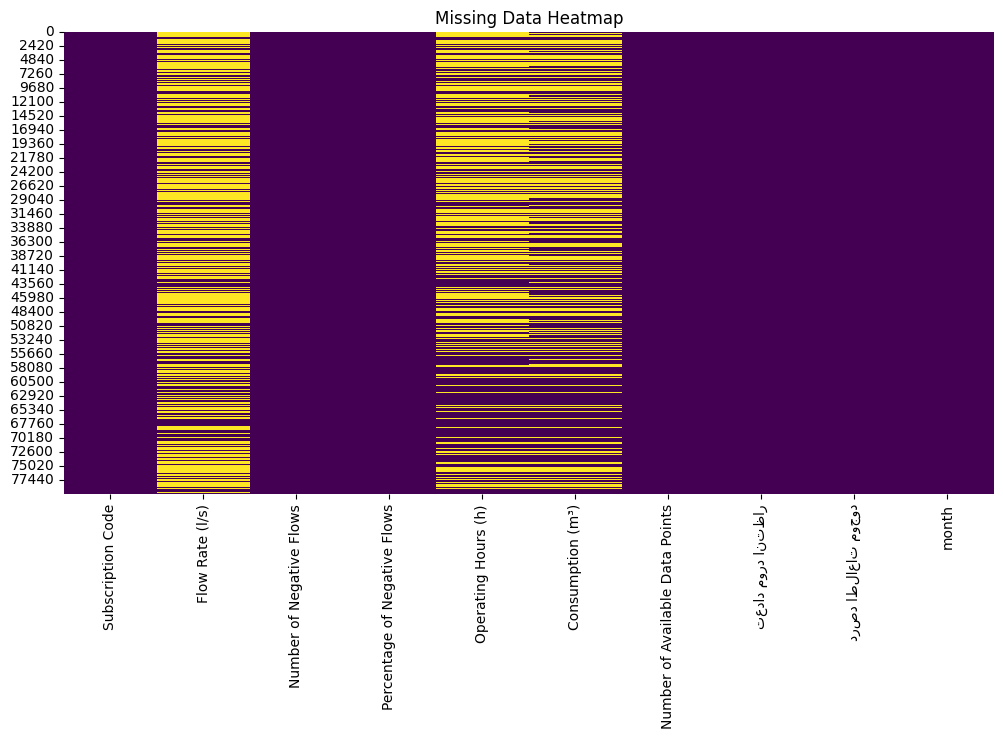

In [16]:
cleaner.visualize_missing()

<Axes: xlabel='Installation_Year', ylabel='Count'>

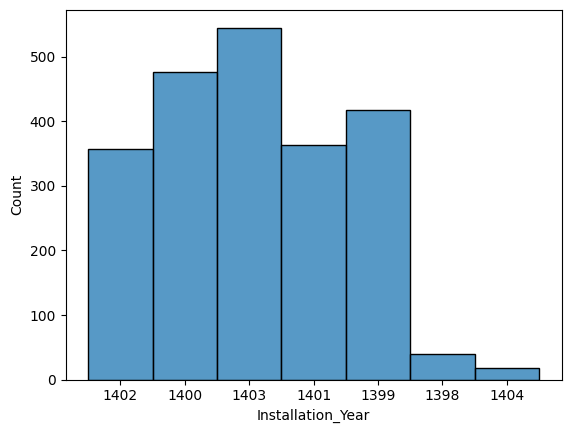

In [17]:
sns.histplot(info_copy['Installation_Year'])

In [18]:
import plotly.express as px

In [19]:
px.histogram(info_copy['Installation_Month'].sort_values(),title="تعداد کنتور های نصب شده در هر ماه")

In [36]:
import jdatetime
# pandas is assumed to be imported as pd based on the notebook context.

def shamsi_month_to_datetime(shamsi_month_str):
    """
    Converts a Shamsi month string (e.g., '1401/01') to a pandas DateTime object
    representing the first day of that month in the Gregorian calendar.
    Returns pd.NaT if conversion fails or input is NaN.
    """
    if pd.isna(shamsi_month_str):
        return pd.NaT
    try:
        year, month = map(int, shamsi_month_str.split('/'))
        # Create a jdatetime date for the first day of the Shamsi month
        # Then convert it to a Gregorian date
        gregorian_date = jdatetime.date(year, month, 1).togregorian()
        # Convert the Gregorian date to a pandas Timestamp object
        return pd.to_datetime(gregorian_date)
    except (ValueError, TypeError) as e:
        # Handles errors from split('/') or map(int, ...) if the string is not in the expected format
        print(f"Warning: Could not parse Shamsi month string '{shamsi_month_str}'. Error: {e}")
        return pd.NaT
    except Exception as e:
        # Catch any other unexpected errors, possibly from jdatetime itself
        print(f"Warning: An unexpected error occurred while converting '{shamsi_month_str}'. Error: {e}")
        return pd.NaT

# Assuming 'df' is your primary DataFrame and it has a 'month' column with string values like '1401/01'.
# This code will attempt to convert that column to datetime objects.

if 'df' in locals() and isinstance(df, pd.DataFrame) and 'month' in df.columns:
    print(f"Original 'month' column data type: {df['month'].dtype}")
    
    # Apply the conversion function to the 'month' column
    # This will overwrite the existing 'month' column with datetime objects
    df['month'] = df['month'].apply(shamsi_month_to_datetime)
    
    print(f"Converted 'month' column data type: {df['month'].dtype}")
    print("Sample of the 'month' column after conversion:")
    print(df['month'].head())
    
    # You can check for any values that failed to convert:
    # print(f"Number of NaT values in 'month' column after conversion: {df['month'].isna().sum()}")
else:
    if 'df' not in locals():
        print("Error: DataFrame 'df' is not defined.")
    elif not isinstance(df, pd.DataFrame):
        print("Error: The variable 'df' is not a pandas DataFrame.")
    else: # 'month' column not in df
        print("Error: The DataFrame 'df' does not have a 'month' column.")


Original 'month' column data type: object
Converted 'month' column data type: datetime64[ns]
Sample of the 'month' column after conversion:
0   2022-03-21
1   2022-03-21
2   2022-03-21
3   2022-03-21
4   2022-03-21
Name: month, dtype: datetime64[ns]


In [47]:
def calculate_meter_age():
    """
    Calculate meter age in years based on the 'Installation Date' column.
    Adds a new column 'meter_age_years' to the info_copy DataFrame.
    """
    # Parse installation dates into datetime, invalid dates become NaT
    info_copy['Installation_Date_dt'] = pd.to_datetime(
        info_copy['Installation Date'],
        format='%Y/%m/%d',
        errors='coerce'
    )
    # Today's date
    today = pd.Timestamp.today()
    # Compute base age by year difference
    info_copy['meter_age_years'] = today.year - info_copy['Installation_Date_dt'].dt.year
    # Subtract one year where installation month/day is after today's month/day
    mask = (
        (info_copy['Installation_Date_dt'].dt.month > today.month) |
        (
            (info_copy['Installation_Date_dt'].dt.month == today.month) &
            (info_copy['Installation_Date_dt'].dt.day > today.day)
        )
    )
    info_copy.loc[mask, 'meter_age_years'] -= 1
    return info_copy


In [55]:
info_copy['Meter Size'] = info_copy['Meter Size'].astype(dtype="object")

In [75]:
# info_copy.drop(columns=['Unnamed: 0'],inplace=True)

In [69]:
info_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Subscription Code                  2218 non-null   object 
 1   License Type                       1567 non-null   object 
 2   County                             2218 non-null   object 
 3   Meter Serial                       2218 non-null   object 
 4   Meter Size                         2218 non-null   object 
 5   Installation Date                  2218 non-null   object 
 6   Last Connection Time               2112 non-null   object 
 7   Consumption in Period (m³)         1319 non-null   float64
 8   Operating Hours in Period (h)      1200 non-null   float64
 9   Average Flow Rate in Period (l/s)  1181 non-null   float64
 10  Installation_Year                  2218 non-null   object 
 11  Installation_Month                 2218 non-null   objec

In [74]:
# info_copy.drop(columns=['Installation_Date_dt','meter_age_years'] , inplace=True)

In [71]:
info_copy['Meter Serial'] = info_copy['Meter Serial'].astype(dtype="object")

In [90]:
info_copy["License Type"].fillna("unknow",inplace=True)

In [93]:
merged = info_copy[["Subscription Code","License Type","Installation_Year","Installation_Month","County","Meter Serial","Meter Size"]].merge(df,on="Subscription Code")

In [98]:
df["Subscription Code"].value_counts()

Subscription Code
111111         252
زندان مرکزی     72
517227          72
541280          72
514564          72
              ... 
806441          36
604749          36
910367          36
100628          36
102290          36
Name: count, Length: 2201, dtype: int64

In [100]:
info_copy[info_copy['Subscription Code'] == "111111"]

,Subscription Code,License Type,County,Meter Serial,Meter Size,Installation Date,Last Connection Time,Consumption in Period (m³),Operating Hours in Period (h),Average Flow Rate in Period (l/s),Installation_Year,Installation_Month
867,111111,unknow,مشهد,909801032852.0,80.0,1400/01/28,1404/01/28 - 02:10:49,3316.235,15223.8,6.27,1400,1400/01
869,111111,unknow,مشهد,909801033219.0,100.0,1400/01/28,1404/01/28 - 02:08:46,144957.100,1329418.4,8.60,1400,1400/01
870,111111,unknow,مشهد,909801033221.0,100.0,1400/01/28,1404/01/28 - 02:08:07,209512.600,2076372.8,8.78,1400,1400/01
871,111111,unknow,مشهد,909801033229.0,80.0,1400/01/28,1404/01/28 - 00:44:00,195455.000,180577.6,3.00,1400,1400/01
872,111111,unknow,مشهد,909801033313.0,80.0,1400/01/28,1404/01/28 - 00:40:37,68429.120,1185099.7,3.11,1400,1400/01
873,111111,unknow,مشهد,909801033641.0,50.0,1400/01/28,1404/01/27 - 02:08:11,4065.521,67798.4,0.91,1400,1400/01
1737,111111,unknow,نیشابور,909801032629.0,150.0,1399/04/19,1404/01/18 - 02:10:47,NaN,NaN,NaN,1399,1399/04


In [112]:
import numpy as np

In [99]:
df[df['Subscription Code'] == "111111"]

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
867,111111,6.32,0,0.0,915.7,268.31,31,31,100.0,2022-03-21
869,111111,8.08,0,0.0,67666.7,10846.60,31,31,100.0,2022-03-21
870,111111,7.43,0,0.0,122179.0,15459.00,31,31,100.0,2022-03-21
871,111111,3.05,0,0.0,68675.2,4959.32,31,31,100.0,2022-03-21
872,111111,3.05,0,0.0,53752.1,5091.54,31,31,100.0,2022-03-21
...,...,...,...,...,...,...,...,...,...,...
78500,111111,5.93,0,0.0,480.4,9962.40,30,30,100.0,2025-02-19
78501,111111,NaN,0,0.0,NaN,NaN,0,30,0.0,2025-02-19
78502,111111,NaN,0,0.0,NaN,NaN,0,30,0.0,2025-02-19
78503,111111,NaN,0,0.0,NaN,NaN,0,30,0.0,2025-02-19


In [126]:
non_unique_subs = info_copy['Subscription Code'].value_counts().head(12)

In [128]:
non_unique_subs.index

Index(['111111', 'زندان مرکزی', '517227', '541280', '514564', '514702',
       '516377', '517048', '222222', '514711', 'چاه شماره 13', '529179'],
      dtype='object', name='Subscription Code')

In [130]:
non_uniques = df[df['Subscription Code'].isin(non_unique_subs.index)]

In [136]:
non_uniques[non_uniques['Consumption (m³)'] < 0]['Subscription Code'].value_counts()

Subscription Code
111111    45
514702     6
514711     2
529179     1
Name: count, dtype: int64

In [137]:
non_uniques.to_csv("non_unique_subscrition_codes.csv")

In [138]:
df.drop_duplicates(subset=['Subscription Code'])

,Subscription Code,Flow Rate (l/s),Number of Negative Flows,Percentage of Negative Flows,Operating Hours (h),Consumption (m³),Number of Available Data Points,تعداد مورد انتظار,درصد اطلاعات موجود,month
0,520009,NaN,0,0.0,NaN,NaN,0,31,0.0,2022-03-21
1,200654,1.38,0,0.0,16492.8,2727.77,31,31,100.0,2022-03-21
2,622162,NaN,0,0.0,NaN,NaN,0,31,0.0,2022-03-21
3,515618,7.05,0,0.0,29319.6,14647.50,31,31,100.0,2022-03-21
4,529232,NaN,0,0.0,NaN,NaN,0,31,0.0,2022-03-21
...,...,...,...,...,...,...,...,...,...,...
2213,925247,NaN,0,0.0,0.0,0.00,31,31,100.0,2022-03-21
2214,518473,12.84,0,0.0,106320.6,32388.00,31,31,100.0,2022-03-21
2215,201250,NaN,0,0.0,0.0,0.00,31,31,100.0,2022-03-21
2216,925005,21.69,0,0.0,39729.8,58070.90,31,31,100.0,2022-03-21


In [139]:
df_copy = df.copy()
df_copy.fillna("missing",inplace=True)

/tmp/ipykernel_145116/2794258824.py:2: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'missing' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [141]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Subscription Code                79848 non-null  object        
 1   Flow Rate (l/s)                  79848 non-null  object        
 2   Number of Negative Flows         79848 non-null  int64         
 3   Percentage of Negative Flows     79848 non-null  float64       
 4   Operating Hours (h)              79848 non-null  object        
 5   Consumption (m³)                 79848 non-null  object        
 6   Number of Available Data Points  79848 non-null  int64         
 7   تعداد مورد انتظار                79848 non-null  int64         
 8   درصد اطلاعات موجود               79848 non-null  float64       
 9   month                            79848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memo

In [147]:
info_copy.drop_duplicates(subset=["Subscription Code"],inplace=True)

In [156]:
df_copy = df.copy()

In [163]:
non_unique_subs.index.tolist()

['111111',
 'زندان مرکزی',
 '517227',
 '541280',
 '514564',
 '514702',
 '516377',
 '517048',
 '222222',
 '514711',
 'چاه شماره 13',
 '529179']

In [167]:
df_copy = df_copy[~df_copy['Subscription Code'].isin(non_unique_subs.index)]


In [187]:
df_copy = df_copy.merge(info_copy[["Subscription Code","License Type","Installation_Year","Installation_Month","County","Meter Serial","Meter Size"]],on='Subscription Code',how='outer',validate="many_to_one")

In [ ]:
df_copy[["Consumption (m³)","Flow Rate (l/s)","Number of Negative Flows","Operating Hours"]]

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79848 entries, 0 to 79847
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Subscription Code                79848 non-null  object        
 1   Flow Rate (l/s)                  33377 non-null  float64       
 2   Number of Negative Flows         79848 non-null  int64         
 3   Percentage of Negative Flows     79848 non-null  float64       
 4   Operating Hours (h)              41304 non-null  float64       
 5   Consumption (m³)                 47081 non-null  float64       
 6   Number of Available Data Points  79848 non-null  int64         
 7   تعداد مورد انتظار                79848 non-null  int64         
 8   درصد اطلاعات موجود               79848 non-null  float64       
 9   month                            79848 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memo

In [95]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82152 entries, 0 to 82151
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Subscription Code                82152 non-null  object        
 1   License Type                     82152 non-null  object        
 2   Installation_Year                82152 non-null  object        
 3   Installation_Month               82152 non-null  object        
 4   County                           82152 non-null  object        
 5   Meter Serial                     82152 non-null  object        
 6   Meter Size                       82152 non-null  object        
 7   Flow Rate (l/s)                  34547 non-null  float64       
 8   Number of Negative Flows         82152 non-null  int64         
 9   Percentage of Negative Flows     82152 non-null  float64       
 10  Operating Hours (h)              42791 non-null  float64  

In [170]:
px.histogram(info_copy['Meter Size'],title="تقسیم بندی بر اساس سایز کنتور")

In [180]:
fig3_1 = px.bar(info_copy[info_copy['Consumption in Period (m³)'] > 0],
x='County',
y='Consumption in Period (m³)',
color='Installation_Year',
title='تقسیم بندی میزان مصرف مشتریان از روی تاریخ نصب کنتور در سال های مختلف',
height=800) # Adjusted height
fig3_1.update_layout(xaxis_tickangle=-60) # Rotated more for potentially long county names
fig3_1.show()

In [179]:
fig3_1 = px.bar(info_copy[info_copy['Consumption in Period (m³)'] > 0],
x='County',
y='Consumption in Period (m³)',
color='Meter Size',

title='میزان مصرف هر شهر و تقسیم بندی بر اساس سایز کنتور ',
height=700) # Adjusted height
fig3_1.update_layout(xaxis_tickangle=-45) # 
fig3_1.show()

تحیلیل دیتا های منفی

In [ ]:
# df_copy = df_copy[['Subscription Code', 'Flow Rate (l/s)', 'Number of Negative Flows',
#        'Percentage of Negative Flows', 'Operating Hours (h)',
#        'Consumption (m³)', 'Number of Available Data Points',
#        'تعداد مورد انتظار', 'درصد اطلاعات موجود', 'month', 'License Type_x',
#        'Installation_Year_x', 'Installation_Month_x', 'County_x',
#        'Meter Serial_x', 'Meter Size_x']]

In [197]:
fig3_1 = px.bar(df_copy[df_copy["Consumption (m³)"] < 0],
x='Installation_Year_x',
y='Consumption (m³)',
color='Meter Size_x',

title='میزان مصرف سالانه منفی و تقسیم بندی بر اساس سایز کنتور ',
height=700) # Adjusted height
fig3_1.update_layout(xaxis_tickangle=-45) 
fig3_1.show()